# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

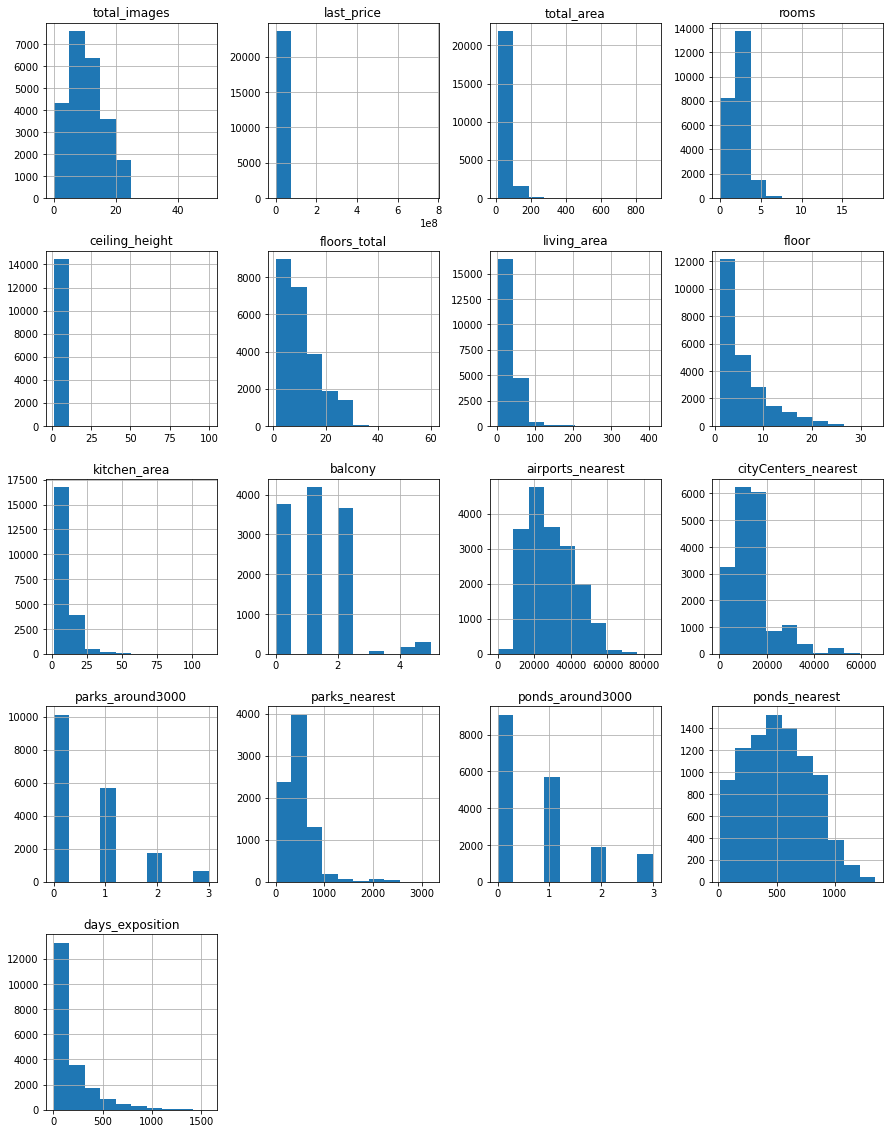

In [4]:
data.hist(figsize=(15, 20));

Из всех гистограмм, на первый взгляд смущает только гистограмма с балконами. Интересно посмотреть на квартиры с колличеством балконов 3 и более. Скорее всего это ошибки

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<AxesSubplot:>

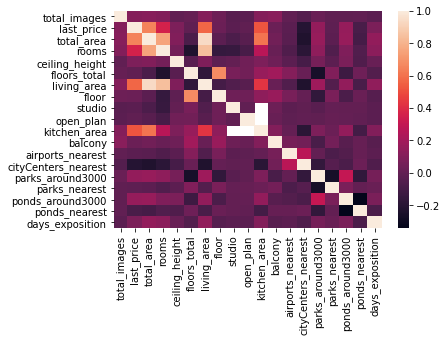

In [6]:
sns.heatmap(data.corr())

На первый взгляд из зависимостей можно обратить внимание на:  
1. Зависимость цены от кухонной площади, жилой площади, колличества комнат и общей площади. Что вполне есстественно.
2. Зависимость кухонной площади, от свободной планировки и от квартир студий. Что тоже естественно.

### Предобработка данных

#### Пропуски

In [7]:
# Посчитаем колличество пропущенных значений для каждого столбца

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

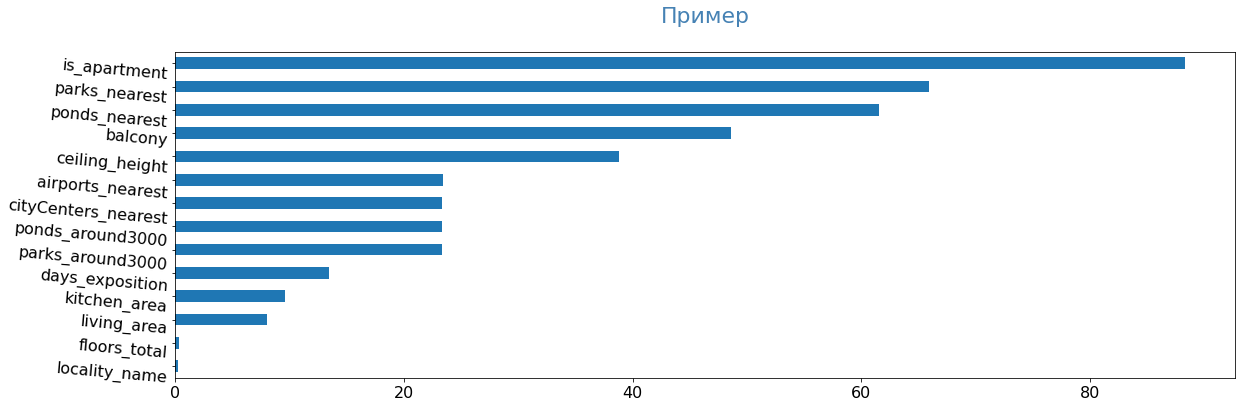

In [9]:
pass_value_barh(data)

По каждой квартире на продажу доступны два вида данных.  
Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Первые - пропуски в этих данных(высота потолков, колличество балконов, жилая и кухонная площадь, колличество этажей, апартаменты) это человеческий фактор. Это ошибки которые были допущены человеком при заполнении обьявления, думаю либо вследвии того что он не знал данный параметр своей квартиры, либо где то данные пропуски могли быть просто случайны из за невнимательности.

Вторые данные что пропуски в таких колонках как расстояние до аэропорта, до центра города, колличество парков и расстояние до них, расстояние и колличество водоемов. Все эти пропуски, это техническая ошибка, возможно сбой при загрузке обявления, или при выгрузке данных. Возможно данные не смогли быть получены во время загрузки обьявления на сайт, и вследствии были заполнены пропусками.

Если логичную замену предложить невозможно, то оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно будет учитывать. 

In [10]:
# заменим все пропуски в колонке балконы на 0

data['balcony'] = data['balcony'].fillna(value=0)

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски стоит заменить на 0.

In [11]:
# Посмотрим уникальные значения и их колличество в столбце апартамены

print (data['is_apartment'].unique())
data['is_apartment'].value_counts()

[nan False True]


False    2725
True       50
Name: is_apartment, dtype: int64

Тут можно увидеть что апартаментов в обявлениях, очень мало. 
Плюс в данной колонке еще и 20 тысяч пропусков. Думаю владелец апартаментов (которых кстати очень мало) точно знает что у него апартаменты, и он не может допустить ошибки в заполнении данной графы.
Поэтому логично будет, что все пропуски в данном столбце следует заменить на False

In [12]:
# Заменим все пропуски в столбце Апартаменты, на False

data['is_apartment'] = data['is_apartment'].fillna(value=False)

# Проверяем сумму пропусков и колличество значений

print (data['is_apartment'].value_counts())
data['is_apartment'].isna().sum()

False    23649
True        50
Name: is_apartment, dtype: int64


0

В столбцах, колличество парков/водоемов в радиусе 3 км. значия 0 и NaN  будут близки по своему смыслу. Потому что, у нас либо есть парки\водоемы поблизости, либо их нет, третьего не дано.
Поэтому для дальнейшей работы, пропуски в этих столбцах можно заполнить нулями.

In [13]:
# Заменим пропуски на нули в столбцах колличество парков, водоемов в радиусе 3 км

data['parks_around3000'] = data['parks_around3000'].fillna(value=0)

In [14]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

In [15]:
# Удаляем строки с пропусками по столбцу locality_name
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [16]:
# Проверим все проведенные замены пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

#### Изменение типов данных

In [17]:
# Рассмотрим типы данных в каждом столбце
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

После просмотра автоматически назначаемых типов данных возникает несколько проблем:

balcony - float64, но должен быть int64.  
first_day_exposition - object, нужно преобразовать в datetime64.  
floors_total - float64, но должен быть int64.  
is_apartment - стал логическим типом после того как мы убрали пропуски.  
parks_around3000 - float64, но должен быть int64  
ponds_around3000 - float64, но должен быть int64  
days_exposition - float64, но должен быть int64  
    
Без проведения очистки типов данных будет сложно провести дополнительный анализ, а так же может "вылезти" непредвиденная ошибка из за неправильных типов данных в датасете.

In [18]:
# Заменим Float тип данных в столбце balcony на целочисленный с помощью метода astype().

data['balcony'] = data['balcony'].astype(int)
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

In [19]:
data['parks_around3000'] = data['parks_around3000'].astype(int)

In [20]:
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [21]:
# Переведем столбец first_day_exposition в тип данных datetime64.
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [22]:
# Проверяем изменения в типах данных
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Неявные дубликаты в названиях населённых пунктов

In [23]:
# На всякий случай убедимся что у нас в датасете нет полностью идеинтичных строк.
data.duplicated().sum()

0

In [24]:
# изучим уникальные значения в колонке locality_name

print (len(data['locality_name'].unique()))
data['locality_name'].unique()

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
# переводим все значения к нижнему регистру, меняем буквы Ё на Е, удаляем слова городского типа, городской поселок = поселок
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'городской поселок')

# проверим замены и уточним колличество уник. значений в столбце
print (len(data['locality_name'].unique()))
data['locality_name'].unique()

323


array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'городской поселок красный бор', 'гатчина', 'деревня федоровское',
       'выборг', 'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'городской поселок лебяжье',
       'городской поселок сиверский', 'поселок молодцово',
       'городской поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'городской поселок ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 

Мы привели наименования столба 'locality_name' в порядок. Колличество уникальных значений в данном столбце снизилось с 364 до 323. Неявные дубликаты исправлены.  
Раз данный столбец впорядке, можем заполнить пропуски в столбе floors_total медианным значением в зависимости от населенного пункта.

In [28]:
# удаляем пропуски floors_total, меняем тип данных на int
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'] = data['floors_total'].astype(int)

# проверяем
data['floors_total'].isna().sum()

0

In [29]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [30]:
# Заполним пропуски в столбе ceiling_height медианным значением в зависимости от населенного пункта.

for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t), 'ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [31]:
data['ceiling_height'].isna().sum()

100

In [32]:
data['ceiling_height'].describe()

count    23465.000000
mean         2.732264
std          1.006558
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [33]:
# удаляем оставшиеся пропуски в высоте потолков
data = data.dropna(subset=['ceiling_height']).reset_index(drop=True)
data['ceiling_height'].isna().sum()

0

#### Выявляем и устраняем аномальные значения

In [34]:
# изучим уник. значения по высоте потолков. 
data['ceiling_height'].unique()

array([  2.7  ,   2.615,   3.03 ,   2.65 ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.6  ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,
         2.8  ,   3.   ,   3.2  ,   2.61 ,   2.51 ,   3.25 ,   3.45 ,
         2.77 ,   2.85 ,   2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.71 ,
         4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,
         2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.78 ,   2.65 ,   2.76 ,
        25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,   2.66 ,   2.59 ,
         2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,   3.11 ,   3.13 ,
         3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,   3.12 ,   2.53 ,
         2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,   2.79 ,   2.95 ,
         4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,   2.83 ,   4.7  ,
         2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,   3.18 ,   3.35 ,
         2.3  ,   2.525,   3.57 ,   2.48 ,   2.62 ,   2.82 ,   3.98 ,
         2.63 ,   3.83 ,  27.   ,   3.52 ,   3.95 ,   3.75 ,   2.88 ,
         3.67 ,   3.

В столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м  
Природа данной аномалии нам понятно, следовательно можно восстановить искаженные значения.  
Поэтому все значения которые больше 10-ти поделим на 10 что бы привести их в нормальный вид. Следовательно, такие значения превратятся в 1,2,3 и тд. 100 перейдет в 10. После этого определим какие значения должны быть нормальными.

In [35]:
# значения больше  10ти делим на 10.
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = \
    data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10

In [36]:
# проверяем
data['ceiling_height'].unique()

array([ 2.7  ,  2.615,  3.03 ,  2.65 ,  2.64 ,  2.5  ,  2.67 ,  2.55 ,
        2.6  ,  2.56 ,  3.05 ,  2.75 ,  2.9  ,  2.56 ,  2.8  ,  3.   ,
        3.2  ,  2.61 ,  2.51 ,  3.25 ,  3.45 ,  2.77 ,  2.85 ,  2.57 ,
        4.15 ,  3.5  ,  3.3  ,  2.71 ,  4.   ,  2.47 ,  2.73 ,  2.84 ,
        3.1  ,  2.34 ,  3.4  ,  2.52 ,  3.06 ,  2.72 ,  2.54 ,  2.78 ,
        2.65 ,  2.76 ,  2.58 ,  3.7  ,  5.2  ,  2.87 ,  2.66 ,  2.59 ,
        2.   ,  2.45 ,  3.6  ,  3.9  ,  2.92 ,  3.11 ,  3.13 ,  3.8  ,
        3.15 ,  3.55 ,  3.16 ,  3.62 ,  3.12 ,  2.53 ,  2.74 ,  2.96 ,
        2.46 ,  5.3  ,  5.   ,  2.79 ,  2.95 ,  4.06 ,  2.94 ,  3.82 ,
        3.54 ,  3.53 ,  2.83 ,  4.7  ,  2.4  ,  3.38 ,  3.01 ,  5.6  ,
        3.65 ,  3.18 ,  3.35 ,  2.3  ,  2.525,  3.57 ,  2.48 ,  2.62 ,
        2.82 ,  3.98 ,  2.63 ,  3.83 ,  3.52 ,  3.95 ,  3.75 ,  2.88 ,
        3.67 ,  3.87 ,  3.66 ,  3.85 ,  3.86 ,  4.19 ,  3.24 ,  4.8  ,
        4.5  ,  4.2  ,  3.36 ,  3.08 ,  3.68 ,  3.07 ,  3.37 ,  3.09 ,
      

Построим диаграмму размаха, и гистограмму что бы посмотреть как распределились значения, что бы выявить редкие и выдающиеся значения.


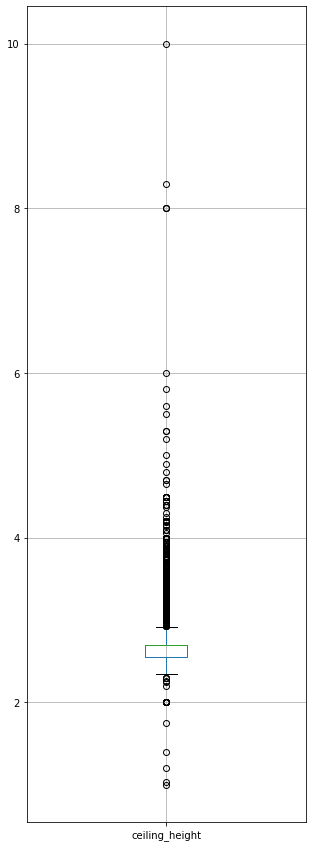

In [37]:
# строим ящик с усами
data.boxplot(column='ceiling_height', grid = True, figsize=(5,15));

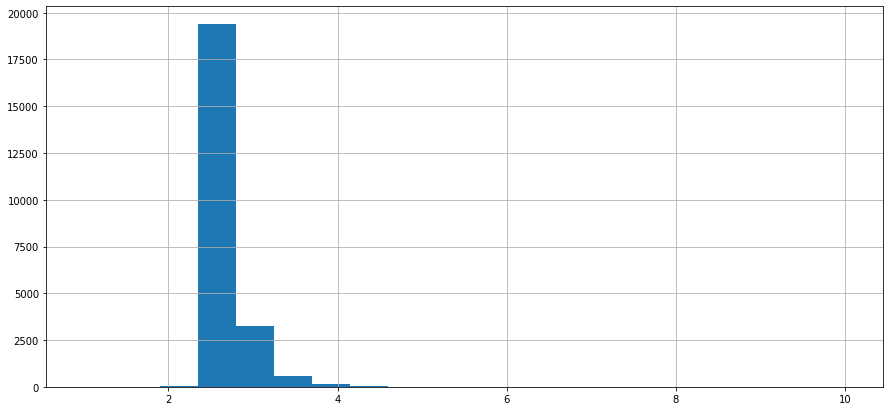

In [38]:
# строим гистограмму
data['ceiling_height'].hist(bins=20, figsize=(15,7));

Анализируя графики можно предположить что нормальными значениями в данной категории будут жил.площадь с высотой потолков от 2х до 4х метров. Удалим все редкие и выбивающиеся значения. которые выходят за указанный порог значений.

In [39]:
# удаляем все строки которые не входят в указанный порог (>2 и < 4)
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 4)]

In [40]:
# проверяем
print (len(data['ceiling_height']))
print (data['ceiling_height'].max())
print (data['ceiling_height'].min())

23359
3.98
2.2


[0 2 1 5 4 3]


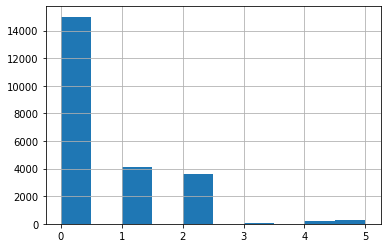

In [41]:
# Проверяем уник.значения по балконам и строим гисторгамму распределения значений
print (data['balcony'].unique())
data['balcony'].hist();

Посмотрим что у нас с балконами. значения 3,4, и 5 вызывают сомнения. Думаю что в данных обьявлениях, число балконов было указано ошибочно. Что косвенно подтверждается маленьким обемом таких значений. Удалим все строки датафрейма где число балконов больше 2.

In [42]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23359 entries, 0 to 23464
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23359 non-null  int64         
 1   last_price            23359 non-null  float64       
 2   total_area            23359 non-null  float64       
 3   first_day_exposition  23359 non-null  datetime64[ns]
 4   rooms                 23359 non-null  int64         
 5   ceiling_height        23359 non-null  float64       
 6   floors_total          23359 non-null  int64         
 7   living_area           21526 non-null  float64       
 8   floor                 23359 non-null  int64         
 9   is_apartment          23359 non-null  bool          
 10  studio                23359 non-null  bool          
 11  open_plan             23359 non-null  bool          
 12  kitchen_area          21176 non-null  float64       
 13  balcony         

In [43]:
# все записи с балконами больше 2х превратим в значения равным 0
data.loc[data['balcony'] > 2, 'balcony'] = 0

In [44]:
# удаляем обьявления где число балконов больше 2х (т.е оставляем все которые меньше или равно 2м)
# data = data[data['balcony'] <= 2]

# check
print (len(data['balcony']))
data['balcony'].unique()

23359


array([0, 2, 1])

In [45]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,359.00","23,359.00","23,359.00","20,237.00","23,359.00","21,526.00","21,176.00","23,359.00","23,359.00"
min,0.00,12.00,2.20,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,3.98,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [46]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7956
2,7820
3,5729
4,1163
5,314
0,191
6,99
7,57
8,11
9,8


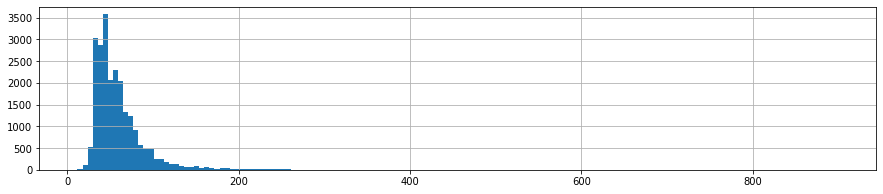

In [47]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

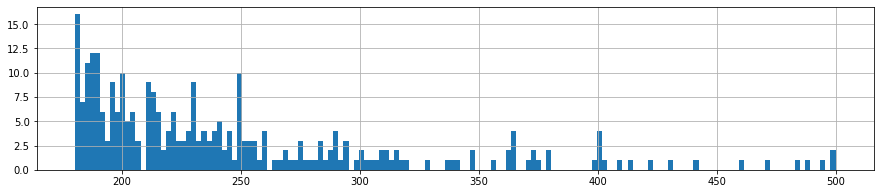

In [48]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [49]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.32,2.50,4.00,"1,050,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.70,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.9,3.00,93.10,3.00,459.00,"10,860,270.00",54.90,15.80,13.00,22.00
0.9976,7.00,299.85,3.80,"1,312.43","77,328,339.20",180.00,50.00,25.00,27.00


In [50]:
data.floors_total.value_counts().to_frame()

,floors_total
5,5696
9,3753
16,1372
12,1359
10,1174
4,1163
25,1075
6,898
17,829
3,637


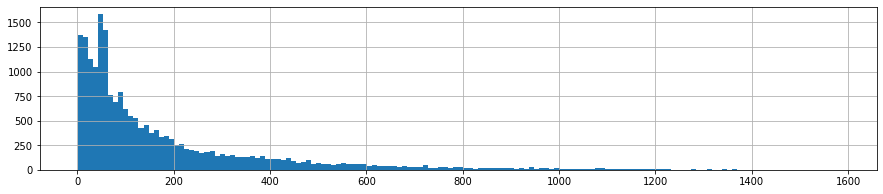

In [51]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

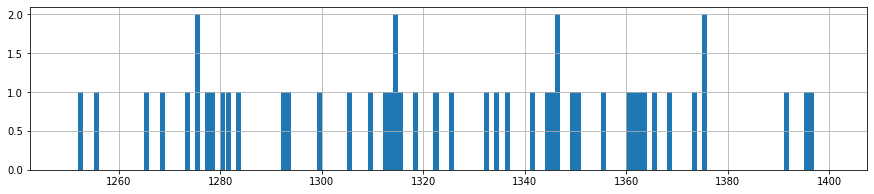

In [52]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (1250, 1400));

In [53]:
# Посчитаем текущий размер датасета, для того что бы оченить обьем удаляемых аномалий.
data_old = data.shape[0]
data_old

23359

На основании предыдущего вывода, будем считать счедующие параметры аномалиями и редкими значениями.

rooms <= 7  
total_area <= 200  
4 < days_exposition <= 1300  
1050000.00 < last_price <= 77000000.00  
13.00 < living_area <= 179.00  
5.00 < kitchen_area <= 49.00  
2.0 < floors_total <= 27.0  

In [54]:
# оценим долю удаляемых аномалий относительно нашего датасета в процентах. По верхней границе
print ((len(data.query('rooms >= 7')) / data_old) * 100)
print ((len(data.query('total_area >= 200')) / data_old) * 100)
print ((len(data.query('days_exposition >= 1300')) / data_old) * 100)
print ((len(data.query('last_price >= 77000000.00')) / data_old) * 100)
print ((len(data.query('living_area >= 179.00')) / data_old) * 100)
print ((len(data.query('kitchen_area >= 49.00')) / data_old) * 100)
print ((len(data.query('floors_total >= 27.0')) / data_old) * 100)
# для примера оценим долю оставляемых значений, для одного параметра (комнаты)
print ()
print ((len(data.query('rooms <= 7')) / data_old) * 100)

0.3724474506614153
0.9032920929834326
0.22261226936084594
0.25257930562095976
0.2354552849008947
0.2354552849008947
0.92897812406353

99.87156984459952


##### check r.2.1 nan

In [55]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23359 entries, 0 to 23464
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23359 non-null  int64         
 1   last_price            23359 non-null  float64       
 2   total_area            23359 non-null  float64       
 3   first_day_exposition  23359 non-null  datetime64[ns]
 4   rooms                 23359 non-null  int64         
 5   ceiling_height        23359 non-null  float64       
 6   floors_total          23359 non-null  int64         
 7   living_area           21526 non-null  float64       
 8   floor                 23359 non-null  int64         
 9   is_apartment          23359 non-null  bool          
 10  studio                23359 non-null  bool          
 11  open_plan             23359 non-null  bool          
 12  kitchen_area          21176 non-null  float64       
 13  balcony         

In [56]:
data = data.query('(rooms <= 7) or (rooms != rooms)')
print ('после I удаления', data.shape[0])

data = data.query('(25 < total_area <= 200) or (total_area != total_area)')
print ('после II удаления', data.shape[0])

data = data.query('(days_exposition <= 1300) or (days_exposition != days_exposition)')
print ('после III удаления', data.shape[0])

после I удаления 23329
после II удаления 22920
после III удаления 22870


In [57]:
data = data.query('(last_price <= 77000000.00) or (last_price != last_price)')
print ('после IV удаления', data.shape[0])

data = data.query('(living_area <= 179.00) or (living_area != living_area)')
print ('после V удаления', data.shape[0])

data = data.query('(kitchen_area <= 49.00) or (kitchen_area != kitchen_area)')
print ('после VI удаления', data.shape[0])

data = data.query('(floors_total <= 27.0) or (floors_total != floors_total)')
print ('после VII удаления', data.shape[0])

после IV удаления 22855
после V удаления 22855
после VI удаления 22823
после VII удаления 22772


In [58]:
# размер отфильтрованного датасета
data_new = data.shape[0]
data_new

22772

In [59]:
# доля удаленных аномалий
print(data_new/data_old)
(1 - (data_new / data_old))*100

0.9748704995933045


2.512950040669548

In [60]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,772.00","22,772.00","22,772.00","19,739.00","22,772.00","21,013.00","20,802.00","22,772.00","22,772.00"
min,0.00,25.07,2.25,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,7.00,200.00,3.98,"1,299.00","77,000,000.00",164.70,48.30,27.00,27.00


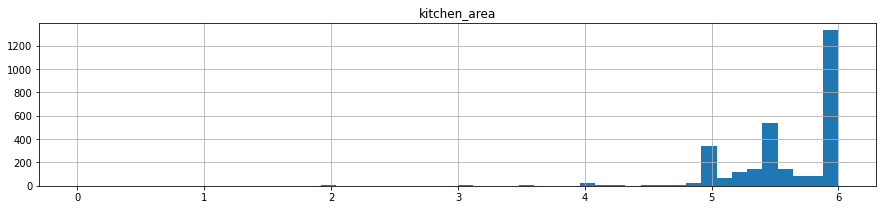

In [61]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,6));

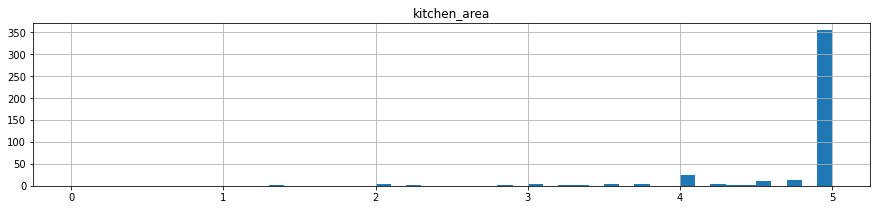

In [62]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

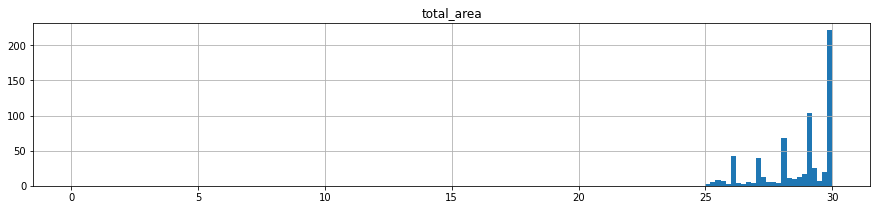

In [63]:
# check
data.hist(column = 'total_area', bins = 150, figsize = (15,3), range = (0,30));

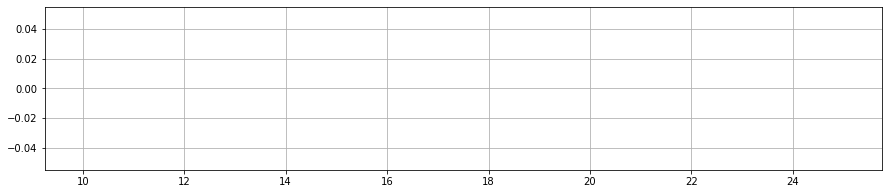

In [64]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (10,25));

### Посчитайте и добавьте в таблицу новые столбцы

In [65]:
# Добавим новый столбец в таблицу - Цена одного квадратного метра

data['price_1m2'] = data['last_price'] / data['total_area']

In [66]:
# Добавим новый столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

data['weekday_posted'] = data['first_day_exposition'].dt.weekday

In [67]:
# месяц публикации объявления

data['month_posted'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [68]:
# год публикации объявления

data['year_posted'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [69]:
# Проверим нулевые и отрицательные значения в столбце этаж
data.query('floor <= 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday_posted,month_posted,year_posted


In [70]:
# Напишем функцию которая проверяет номер жилого этажа в обьявлении, и возвращает значение «первый», «последний», «другой»

def check_floor(row):
    floors_total = row['floors_total']
    floor = row ['floor']
    if floor == 1:
        return 'first'
    if floor <= 0:
        return 'basement'
    if floor == floors_total:
        return 'last'
    return 'another'

In [71]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)

data['floor_type'] = data.apply(check_floor, axis=1)
data['floor_type'].unique()

array(['another', 'first', 'last'], dtype=object)

In [72]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений). в 1 км 1000м

data['city_сenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
data['city_сenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23460    34.0
23461     4.0
23462     NaN
23463    10.0
23464     NaN
Name: city_сenters_nearest_km, Length: 22772, dtype: float64

Итак, мы не можем перевести столбец к целочисленному типу int,  из-за наличия пропусков в столбе. Значит нужно что то с ними сделать.  
Пропуски в расстоянии могут говорить о том, что рядом центра города нет, либо о том, что центр находится очень далеко и расстояние не учитывается в приложении.   
В данном случае, я считаю, можно заполнить пропуски очень большим одинаковым числом (раз это расстояние до ближайшего), неким маркером, чтобы по нему потом можно было удобно фильтроваться. Например возьмем число 999 км для нового столба city_сenters_nearest_km. для метров возьмем число 999 000 и заполним пропуски этим числов в столбце cityCenters_nearest

In [73]:
# Заполним пропуски в city_сenters_nearest_km на 999 км и приведем формат столбца к целочисленному формату

data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].fillna(999).astype(int)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(999000)
data['city_сenters_nearest_km'],data['cityCenters_nearest']

(0         16
 1         19
 2         14
 3          7
 4          8
         ... 
 23460     34
 23461      4
 23462    999
 23463     10
 23464    999
 Name: city_сenters_nearest_km, Length: 22772, dtype: int64,
 0         16028.0
 1         18603.0
 2         13933.0
 3          6800.0
 4          8098.0
            ...   
 23460     34104.0
 23461      4232.0
 23462    999000.0
 23463     10364.0
 23464    999000.0
 Name: cityCenters_nearest, Length: 22772, dtype: float64)

### Проведите исследовательский анализ данных

#### Исследование параметров объектов: общей площади, жилой площади, площади кухни, цены, количества комнат и т.д.

In [74]:
# Для начала создадим список параметров которые мы хотим детальнее изучить

parametrs = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', \
             'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', \
             'weekday_posted', 'month_posted']

# Создадим data_filtered таблицу с необходимыми нам в данный момент столбцами

data_filtered = data[parametrs]
data_filtered

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floor_type,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday_posted,month_posted
0,108.00,51.0,25.00,13000000.0,3,2.700,8,another,16,16028.0,18863.0,482.0,3,3
1,40.40,18.6,11.00,3350000.0,1,2.615,1,first,11,18603.0,12817.0,NaN,1,12
2,56.00,34.3,8.30,5196000.0,2,2.700,4,another,5,13933.0,21741.0,90.0,3,8
3,159.00,NaN,NaN,64900000.0,3,2.700,9,another,14,6800.0,28098.0,84.0,4,7
4,100.00,32.0,41.00,10000000.0,2,3.030,13,another,14,8098.0,31856.0,112.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23460,62.40,40.0,8.00,4600000.0,3,2.600,8,another,9,34104.0,45602.0,352.0,4,8
23461,133.81,73.3,13.83,9700000.0,3,3.700,3,another,5,4232.0,24665.0,796.0,1,3
23462,59.00,38.0,8.50,3100000.0,3,2.500,4,another,5,999000.0,NaN,NaN,0,1
23463,76.75,NaN,23.30,11475000.0,2,3.000,12,another,17,10364.0,39140.0,173.0,1,3


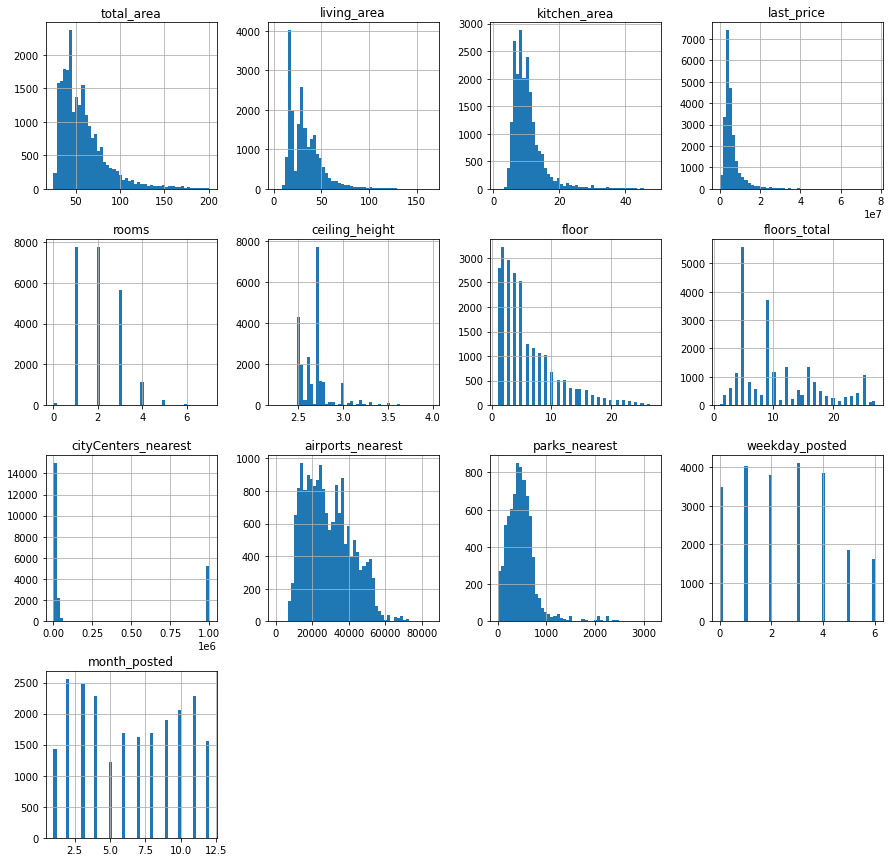

In [75]:
# Построим гистограммы распределения
data_filtered.hist(figsize= (15,15), bins = 50);

Построилось 13 графиков из 14 необходимых.  
В столбце Тип этажа, значения категорийные, поэтому нам необходимо их сначала сложить и отсортировать.  
А так же, мне не нравиться какой у нас получается график с ценой, легенда слишком большая а сам график не подробный. Вследсвии чего он получается не информативным.

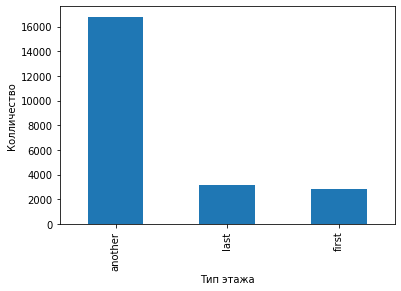

In [76]:
# Достраиваем последний необходимый график, сортируем значения и стоим график.
fig, ax = plt.subplots()

data_filtered['floor_type'].value_counts().plot(kind='bar');
ax.set_xlabel('Тип этажа');
ax.set_ylabel('Колличество');

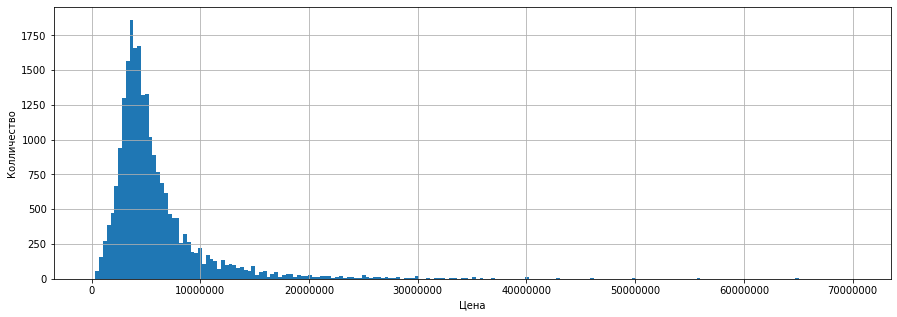

In [77]:
# Попробуем отформатировать и сделать график с ценой более крупным.(p.s за помощь с кодом спасибо Yana Maksimenko)

fig = plt.figure(figsize=(15,5))

ax=fig.gca()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: int(x)))

data_filtered['last_price'].hist(bins=200, ax=ax, range=(0,70000000));
ax.set_xlabel('Цена');
ax.set_ylabel('Колличество');

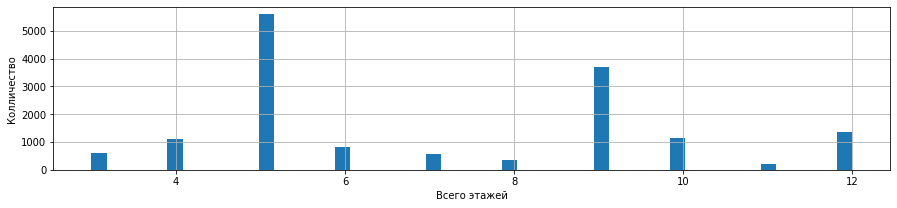

In [78]:
# посмотрим floor_total поближе.
fig, ax = plt.subplots()
data.floors_total.hist(bins=50, figsize=(15,3), range=(3,12));
ax.set_xlabel('Всего этажей');
ax.set_ylabel('Колличество');

Что можно заметить на указанных гистограммах:  
'total_area' - большинство обьявлений имеют около 80м2 общей площади  
'living_area' - большая часть обьявлений имеют 20м2 и 40м2 жилой площади  
'kitchen_area' - даже без удаления пропусков по кух. площади, график показал нормальное распределение пуассона, чаще кухонная площадь в обьявлениях составляет 10м2  
'last_price' - большинство обявлений имеюли цену от 4 до 6 млн. Основная масса обьявлений стоит до 10 млн. 
'rooms' - чаще всего в обьявлениях встречаются 1 и 2х комнатные жилплощади.Чуть реже 3х комнатные.   
'ceiling_height' - тут все просто в основном потолки 2.4, 2.7 и 3.0 метра.  
'floor' - нормальное распределение пуассона, большинство обьявлений имеют жилье с 1 по 5 этаж  
'floor_type' - обем квартир с первым и последним этажем примерно одинаковый, большую часть обьявлений составляют тип квартир с этажем другой  
'floors_total' - большинство домов в котором продается жилье имеют 5 или 9 этажей, из чего можно сделать вывод о том, что в большинстве случаев это старый жилой фонд.  
'cityCenters_nearest' - большинство жилья из обьявлений находятся в центре города, еще есть приличная прослойка жилья которая находится совсем в глубинке.  
'airports_nearest' - много обьявлений которые находятся недалеко от аэропорта.   
'parks_nearest' - большинство жилья имеет недалеко от себя, парк (и это хорошо)  
'weekday_posted' - чаще обьявления выкладываются в будние дни  
'month_posted' - февраль, март, апрель и ноябрь, в эти месяцы чаше выкладывают обьявления о продаже жилья  

#### Исследование количества дней для продажи квартиры

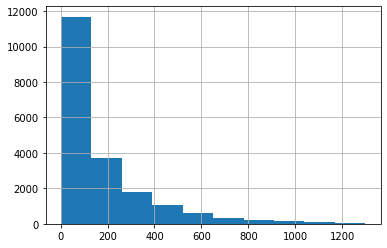

In [79]:
# строим гистограмму по days_exposition
data['days_exposition'].hist();

In [80]:
# считаем медиану и среднее арифметическое по days_exposition
print ("Медиана", data['days_exposition'].median())
print ("Среднее арифметическое", data['days_exposition'].mean())
print ("Мода", data['days_exposition'].mode())

Медиана 95.0
Среднее арифметическое 177.18162014286438
Мода 0    45.0
dtype: float64


Продажа жилья обычно занимает около 200-300 дней.  
Быстрой продажей можно считать продазу за 90 дней.  
Необычно долгими продажами можно считать продажу от 600 дней и выше

In [81]:
# Посмотрим динамику средней скорости продаж обьявления в днях, по годам.
# Создадим сводную таблицу и на ее основе построим линейный график
data_pivot_days = data.pivot_table (index = 'year_posted', values = 'days_exposition',aggfunc='median')
data_pivot_days

,days_exposition
year_posted,
2014,781.0
2015,565.5
2016,238.0
2017,103.0
2018,64.0
2019,24.0


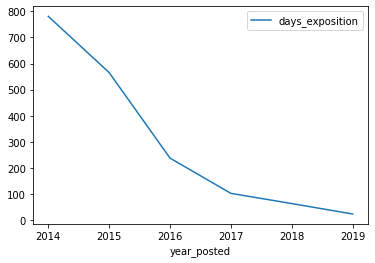

In [82]:
# График, изменение средней скорости продаж по годам
data_pivot_days.plot(y='days_exposition');

Можно с уверенностью сказать, что с каждым годом, скорость продажи недвижимости растет и растет очень быстро.

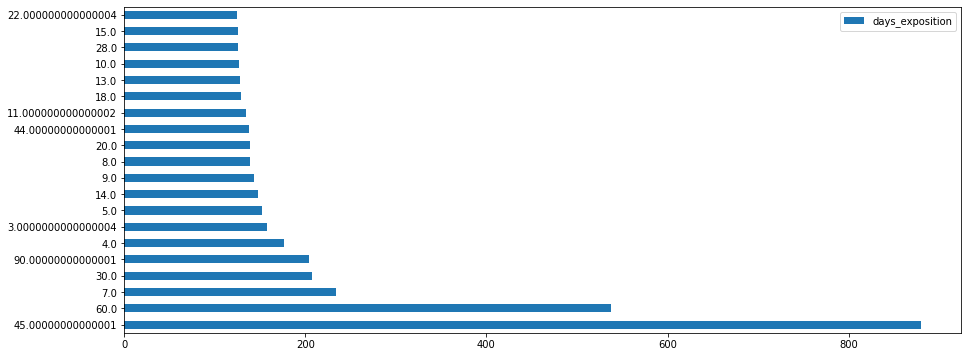

In [83]:
# check
# Моды на реальных данных

try:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t') 
except:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### Исследование факторов, влияющих на полную стоимость квартиры

In [84]:
# Создадим, список необходимых параметров для проверки.

parametrs2=['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type','weekday_posted',\
            'month_posted', 'year_posted']
parametrs3=['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type']

# Отлифтрованная таблица с необходимыми параметрами для проверки.
data_filtered2 = data[parametrs3]

# РАсчитаем корреляцию для кождой взаимосвязи.
corr = data_filtered2.corr()

corr

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.747580,0.636235,0.557684,0.448650
total_area,0.747580,1.000000,0.926001,0.562387,0.787239
living_area,0.636235,0.926001,1.000000,0.326041,0.874004
kitchen_area,0.557684,0.562387,0.326041,1.000000,0.192193
rooms,0.448650,0.787239,0.874004,0.192193,1.000000


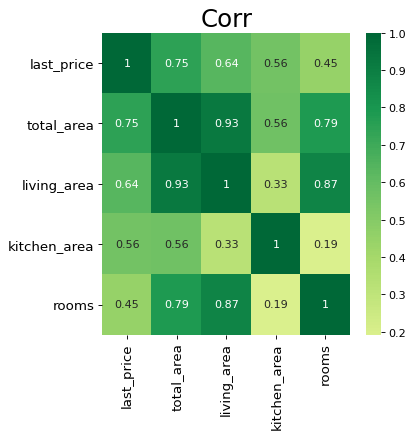

In [85]:
# Построим хитмап кореляции

plt.figure(figsize=(5,5), dpi= 80)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Corr', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

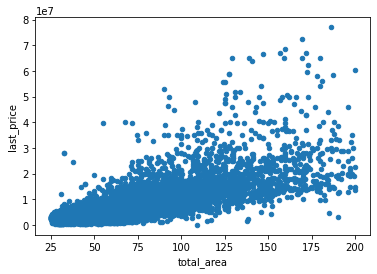

In [86]:
data.plot(x='total_area', y='last_price', kind='scatter');

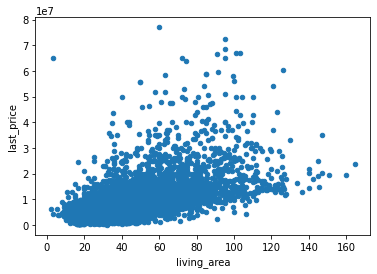

In [87]:
data.plot(x='living_area', y='last_price', kind='scatter');

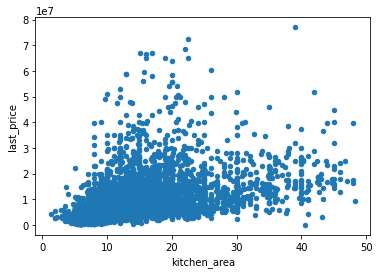

In [88]:
data.plot(x='kitchen_area', y='last_price', kind='scatter');

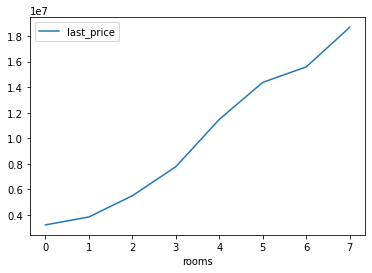

In [89]:
data_pivot = data.pivot_table(index=['rooms'],values='last_price')
data_pivot.plot();

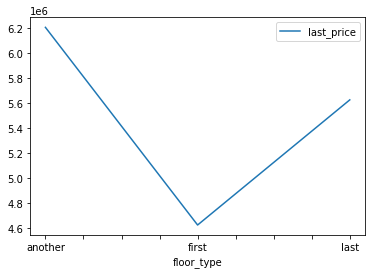

In [90]:
data_pivot = data.pivot_table(index=['floor_type'],values='last_price')
data_pivot.plot();

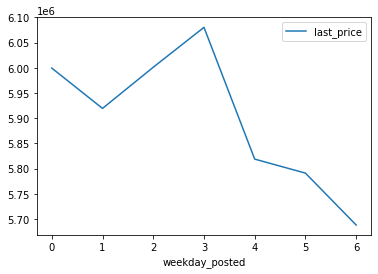

In [91]:
data_pivot = data.pivot_table(index=['weekday_posted'],values='last_price')
data_pivot.plot();

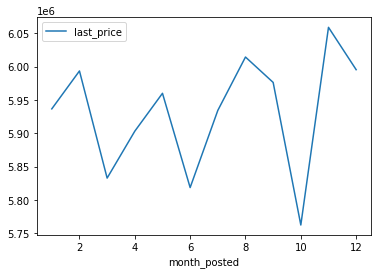

In [92]:
data_pivot = data.pivot_table(index=['month_posted'],values='last_price')
data_pivot.plot();

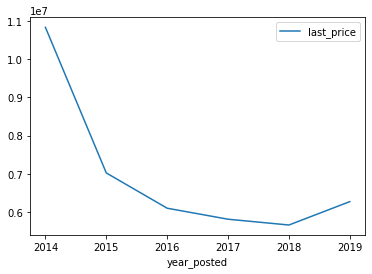

In [93]:
data_pivot = data.pivot_table(index=['year_posted'],values='last_price')
data_pivot.plot();

Итак, зависимость цены от:  
**'total_area'** корреляция равна 0.73. Зависимость есть. Но я бы сказал что этот фактор влияет на цену не так сильно как хотелось бы.  
**'living_area'** - корреляция равна 0.62. Зависимость есть но уже чуть слабее чем зависимость от общей площади.   
**'kitchen_area'**- коэф. кореляции равен 0.54. Зависимость есть но я бы уже сказал что она частиная. Она слабее чем зависимость остальных площадей.  
**'rooms'**- график показывает нам прямую зависимость колличества комнат на цену обьекта недвижимости. Но соит обратить внимания что коэффицент корреляции при этом всего - 0.44.    
**'floor_type'** - тут очень показательная зависимость, которая говорит, что обьект на первом этаже стоят дешевле всего, а дороже всего на последнем этаже.  
**'weekday_posted'** - цена обьектов выставляемых с пн по четверг дороже, чем тех обьявлений которые выставляют с пт. по вскр. Зависимость есть 
**'month_posted'** - летом цены на жильше довольно низкие, в то время как в сентябре и декабре самые высокие. Так же очень быстро цены падают в октябре и к ноябрю опять растут.  
**'year_posted'** - в целом мы видим тенденция к снижению цен по годам, думаю это можно обьяснить увелиением обьема жилой недвижимости.

#### Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра

In [94]:
# составляем список из десяти населенных пунктов в которых наибольшее кол-во объявлений.
data.value_counts('locality_name').head(10)

locality_name
санкт-петербург      15145
поселок мурино         508
поселок шушары         432
всеволожск             389
пушкин                 357
колпино                336
поселок парголово      318
гатчина                306
деревня кудрово        280
выборг                 228
dtype: int64

In [95]:
# составляем список
names = ['санкт-петербург','поселок мурино','поселок шушары','всеволожск','колпино','пушкин',\
         'поселок парголово','гатчина','деревня кудрово','петергоф']

# Отберем из датасета нужные столбцы, сделаем срез и выделим необходимые города. 
# После сделаем сводную таблицу для расчета средней стоимости кв. м. по населенным пунктам

data2 = (
    data[['locality_name','price_1m2']].query('locality_name.isin(@names)')
                                       .pivot_table(index='locality_name',values='price_1m2')
                                       .sort_values('price_1m2', ascending=False)
)

data2

,price_1m2
locality_name,
санкт-петербург,112285.465452
пушкин,102850.582246
деревня кудрово,91966.392026
поселок парголово,90310.238138
петергоф,84757.559690
поселок мурино,84744.861250
поселок шушары,78152.198817
колпино,75239.590783
гатчина,68799.627791


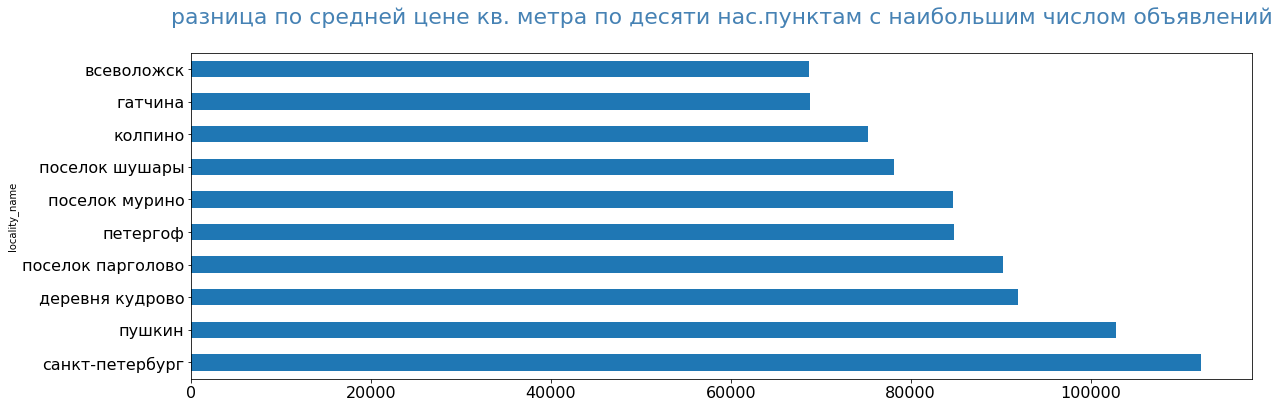

In [96]:
(
    data2.plot(y='price_1m2', kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
         .set_title('разница по средней цене кв. метра по десяти нас.пунктам с наибольшим числом объявлений' + "\n", \
                fontsize = 22, color = 'SteelBlue')
);

**top 5 регионов с самым дорогим квадратным метром** - санкт-петербург(109323.87), Пушкин(101333.80), деревня кудрово(92553.82), поселок парголово(90014.79), поселок мурино(85638.34).  
**top 5 регионов с самым дешевым квадратным метром** - петергоф(82677.72) поселок шушары(78001.59) колпино всеволожск(74306.98) гатчина(67638.40).	

In [97]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['price_1m2']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')

,count,mean
locality_name,,
санкт-петербург,"15,145","112,285"
пушкин,357,"102,851"
деревня кудрово,280,"91,966"
поселок парголово,318,"90,310"
поселок мурино,508,"84,745"
поселок шушары,432,"78,152"
колпино,336,"75,240"
гатчина,306,"68,800"
всеволожск,389,"68,673"


#### Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

In [98]:
# check
data[data['locality_name'] == 'санкт-петербург']['city_сenters_nearest_km'].value_counts()

12     1575
15     1548
13     1437
14     1260
16     1252
11     1157
17      852
5       836
10      704
4       643
9       583
8       574
6       560
7       399
3       327
2       268
18      255
22      197
1       162
19      153
21      117
23       82
999      55
26       43
25       26
24       26
0        20
20       19
28        7
29        6
27        2
Name: city_сenters_nearest_km, dtype: int64

Из ячейки выше, получается у нас нет значений по питеру где км от центра больше 29, игнорируя нашу заглушку.

In [99]:
data.last_price.isna().sum()

0

In [100]:
spb = data[data['locality_name'] == 'санкт-петербург']
spb['last_price'] = spb['last_price'] * 0.000001
spb=spb.pivot_table(index='city_сenters_nearest_km', values='last_price')
spb

/tmp/ipykernel_1535/2311548445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['last_price'] = spb['last_price'] * 0.000001


,last_price
city_сenters_nearest_km,
0,22.395154
1,12.324068
2,12.166478
3,10.132074
4,10.804401
5,11.344075
6,11.624006
7,12.901468
8,8.839257


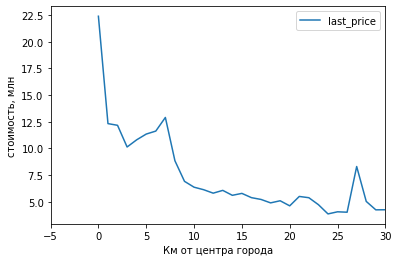

In [101]:
# Рисуем весь график

spb.plot();
plt.xlabel('Км от центра города');
plt.ylabel('стоимость, млн');
plt.xlim(-5,30);

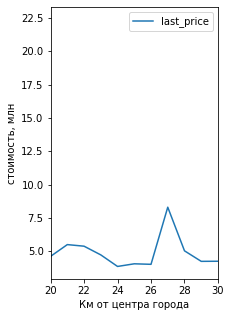

In [102]:
# расматриваем второй всплеск цены
spb.plot(figsize = (3,5));
plt.xlabel('Км от центра города');
plt.ylabel('стоимость, млн');
plt.xlim(20,30);

Зависимость есть. Чем ближе обьект к центру тем сильнее растет его цена.
На графике мы можем увидеть два всплеска цены относительно нисходящего тренда. Первый примерно 5-7 км от центра, второй примерно на 27км от центра.  
Нельзя сказать что 30км от города это уже окраина, значит возможно, что в этих километрах (5-7 и 27) могут находиться какие нибудь престижные районы с элитным жильем и новой застройкой. 
Например гугл говорит о том что в районе 30км от центра СПБ находится Петродворцовый район с крупным научным центром и спокойным зеленым оазисом с малоэтажными домами комфорт-класса и элитными таунхаусами. Возможно именно жти факторы оказывают влияние на цену.

In [103]:
# способы группировки и сортировки информации

(
    data
     .query('3 <= city_сenters_nearest_km <=5 ')
     .groupby(['city_сenters_nearest_km', 'floor_type'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

In [104]:
# способы группировки и сортировки информации

(
    data[data['locality_name'] == 'санкт-петербург']
     .query('city_сenters_nearest_km == 27 ')
).T

,742,5907
total_images,13,6
last_price,14350000.0,2250000.0
total_area,74.0,32.0
first_day_exposition,2017-11-28 00:00:00,2018-02-27 00:00:00
rooms,2,1
ceiling_height,3.13,2.7
floors_total,5,2
living_area,30.0,16.5
floor,3,2
is_apartment,False,False


### Общий вывод

В нашем распоряжении были данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.  
Необходимо было выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.  
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.  

Для проведения Исследовательского анализа данных были поставлены следущие вопросы:  
1.Исследование параметров объектов: общей площади, жилой площади, площади кухни, цены, количества комнат и т.д.  
2.Исследование количества дней для продажи квартиры  
3.Исследование факторов, влияющих на полную стоимость квартиры  
4.Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра:  
5.Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра:  

#### Исследование параметров объектов: общей площади, жилой площади, площади кухни, цены, количества комнат и т.д.
Общая площадь - большинство обьявлений имеют около 80м2 общей площади  
Жилая площадь - большая часть обьявлений имеют 20м2 и 40м2 жилой площади  
Площадь кухни - чаще кухонная площадь в обьявлениях составляет около 10м2  
Цена на момент снятия с публикации - большинство обявлений имеюли цену от 4 до 6 млн. Основная масса обьявлений стоит до 10 млн.   
Колличество комнат - чаще всего в обьявлениях встречаются 1 и 2х комнатные жилплощади.Чуть реже 3х комнатные.    
Высота потолков - тут все просто в основном потолки 2.4, 2.7 и 3.0 метра.  
Этаж - большинство обьявлений имеют жилье с 1 по 5 этаж  
Тип этажа (первый, последний и другой) - объем квартир с первым и последним этажем примерно одинаковый, большую часть обьявлений составляют тип квартир с этажем другой.  
Всего этажей - большинство домов в котором продается жилье имеют 5 или 9 этажей, из чего можно сделать вывод о том, что в большинстве случаев это старый жилой фонд.   
расстояние до центра в м - большинство жилья из обьявлений находятся в центре города, еще есть приличная прослойка жилья которая находится совсем в глубинке.  
расстояние до аэропорта в м - много обьявлений которые находятся недалеко от аэропорта.   
расстояние до парка - большинство жилья имеет недалеко от себя, парк.  
день публикации - чаще обьявления выкладываются в будние дни  
месяц публикации - февраль, март, апрель и ноябрь, в эти месяцы чаше выкладывают обьявления о продаже жилья  

#### Исследование количества дней для продажи квартиры:
Продажа жилья обычно занимает около 200-300 дней. Быстрой продажей можно считать продазу за 90 дней. Необычно долгими продажами я бы рекомендовал считать продажу от 600 дней и выше. Так же, можно с уверенностью сказать, что с каждым годом, скорость продажи недвижимости растет и растет очень быстро.

#### Исследование факторов, влияющих на полную стоимость квартиры:  
Общая площадь - корреляция равна 0.73. Зависимость есть. Но я бы сказал что этот фактор влияет на цену не так сильно как хотелось бы.  
Жилая площадь - корреляция равна 0.62. Зависимость есть но уже чуть слабее чем зависимость от общей площади.   
Кухонная площадь - коэф. кореляции равен 0.54. Зависимость есть но я бы уже сказал что она частиная. Она слабее чем зависимость остальных площадей.  
Колличество комнат - график показывает нам прямую зависимость колличества комнат на цену обьекта недвижимости. Но соит обратить внимания что коэффицент корреляции при этом всего - 0.44.    
Тип этажа(первый, последний, другой) - тут очень показательная зависимость, которая говорит, что обьект на первом этаже стоят дешевле всего, а дороже всего на последнем этаже.  
День размещения обьявления - цена обьектов выставляемых с пн по четверг дороже, чем тех обьявлений которые выставляют с пт. по вскр. Зависимость есть 
Месяц размещения обьявления - летом цены на жильше довольно низкие, в то время как в сентябре и декабре самые высокие. Так же очень быстро цены падают в октябре и к ноябрю опять растут.  
Год объявления - в целом мы видим тенденция к снижению цен по годам, думаю это можно обьяснить увелиением обьема жилой недвижимости. 

#### Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра:  
top 5 регионов с самым дорогим квадратным метром - санкт-петербург(109323.87), Пушкин(101333.80), деревня кудрово(92553.82), поселок парголово(90014.79), поселок мурино(85638.34).  
top 5 регионов с самым дешевым квадратным метром - петергоф(82677.72) поселок шушары(78001.59) колпино всеволожск(74306.98) гатчина(67638.40).	

#### Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра:
Зависимость есть. Чем ближе обьект к центру тем сильнее растет его цена.
На графике мы можем увидеть два всплеска цены относительно нисходящего тренда. Первый примерно 5-7 км от центра, второй примерно на 27км от центра.  
Нельзя сказать что 30км от города это уже окраина, значит возможно, что в этих километрах (5-7 и 27) могут находиться какие нибудь престижные районы с элитным жильем и новой застройкой. 
Например гугл говорит о том что в районе 30км от центра СПБ находится Петродворцовый район с крупным научным центром и спокойным зеленым оазисом с малоэтажными домами комфорт-класса и элитными таунхаусами. Возможно именно жти факторы оказывают влияние на цену.